# Importing all the libraries needed

In [ ]:
!pip install kaggle==1.5.12  # Install Kaggle API client

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json # API key

!kaggle datasets download -d fedesoriano/heart-failure-prediction -p /content/data --unzip # Download dataset

mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.11/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
import os
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
import matplotlib
matplotlib.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv("/content/drive/My Drive/enhanced_longitudinal_cardiovascular_dataset.csv")
df= data.copy()
data.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,patient_id,visit_num,visit_date,clinical_notes,time_since_first_visit
0,66,M,ATA,104,313,1,Normal,146,N,1.035345,Flat,0,P00000,1,2020-03-12,Patient presents with chest pain and shortness...,0
1,79,M,NAP,91,182,1,LVH,124,N,-0.845760,Up,0,P00001,1,2020-04-15,Patient appears well with no acute complaints....,0
2,56,M,TA,84,156,0,Normal,116,Y,1.028825,Up,0,P00002,1,2020-03-31,Patient appears well with no acute complaints....,0
3,42,M,NAP,177,209,0,LVH,165,Y,-1.963963,Flat,0,P00003,1,2020-04-01,Patient reports occasional chest discomfort. V...,0
4,70,M,NAP,127,277,1,Normal,68,Y,2.466916,Up,0,P00004,1,2020-04-01,Patient presents with chest pain and shortness...,0


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
data = pd.read_csv('/content/drive/My Drive/heart.csv')
df = data.copy()
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
data.dtypes

,0
Age,int64
Sex,object
ChestPainType,object
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,object
MaxHR,int64
ExerciseAngina,object
Oldpeak,float64


In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,visit_num,time_since_first_visit
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.833333,137.468410,369.383442,0.490196,131.138344,1.653216,0.561002,2.505447,135.490196
std,14.939847,35.763926,139.070771,0.500176,41.380715,2.533745,0.496535,1.123494,101.114452
min,28.000000,80.000000,126.000000,0.000000,60.000000,-2.581727,0.000000,1.000000,0.000000
25%,41.000000,104.000000,249.000000,0.000000,93.000000,-0.521649,0.000000,2.000000,90.000000
50%,54.000000,136.000000,374.500000,0.000000,134.000000,1.583738,1.000000,3.000000,180.000000
75%,66.000000,169.000000,495.500000,1.000000,167.750000,3.848047,1.000000,4.000000,270.000000
max,79.000000,199.000000,602.000000,1.000000,201.000000,6.191636,1.000000,5.000000,360.000000


The describe() function in pandas is very handy in getting various summary statistics.This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data.

In [ ]:
string_col = df.select_dtypes(include="object").columns
df[string_col]=df[string_col].astype("object")

In [ ]:
df.dtypes

,0
Age,int64
Sex,object
ChestPainType,object
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,object
MaxHR,int64
ExerciseAngina,object
Oldpeak,float64


## Getting the categorical columns

In [ ]:
string_col=df.select_dtypes("object").columns.to_list()
string_col

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [ ]:
num_col=df.columns.to_list()
#print(num_col)
for col in string_col:
    num_col.remove(col)
num_col.remove("HeartDisease")

# Data Preprocessing

## 1. Checking and Handling Null Values :

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


### Handling Categorical Variables

In [ ]:
df[string_col].head()
for col in string_col:
    print(f"The distribution of categorical valeus in the {col} is : ")
    print(df[col].value_counts())

The distribution of categorical valeus in the Sex is : 
Sex
M    725
F    193
Name: count, dtype: int64
The distribution of categorical valeus in the ChestPainType is : 
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64
The distribution of categorical valeus in the RestingECG is : 
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64
The distribution of categorical valeus in the ExerciseAngina is : 
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64
The distribution of categorical valeus in the ST_Slope is : 
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64


In [ ]:
df_tree = df.apply(LabelEncoder().fit_transform)
df_tree.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,12,1,1,41,147,0,1,98,0,10,2,0
1,21,0,2,55,40,0,1,82,0,20,1,1
2,9,1,1,31,141,0,2,25,0,10,2,0
3,20,0,0,39,72,0,1,34,1,25,1,1
4,26,1,2,49,53,0,1,48,0,10,2,0


We can use this directly in many tree-based models:
- Decision trees
- Random forest
- Extra Trees
- Or any kind of boosted trees model
    - XGBoost
    - GBM
    - LightGBM
    
This type of encoding cannot be used in linear models, support vector machines or neural networks as they expect data to be normalized (or standardized). For these types of models, we can binarize the data.
As shown bellow :

In [ ]:
df_nontree=pd.get_dummies(df,columns=string_col,drop_first=False)
df_nontree.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True


In [ ]:
target="HeartDisease"
y=df_nontree[target].values
df_nontree.drop("HeartDisease",axis=1,inplace=True)
df_nontree=pd.concat([df_nontree,df[target]],axis=1)
df_nontree.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,40,140,289,0,172,0.0,False,True,False,True,...,False,False,True,False,True,False,False,False,True,0
1,49,160,180,0,156,1.0,True,False,False,False,...,False,False,True,False,True,False,False,True,False,1
2,37,130,283,0,98,0.0,False,True,False,True,...,False,False,False,True,True,False,False,False,True,0
3,48,138,214,0,108,1.5,True,False,True,False,...,False,False,True,False,False,True,False,True,False,1
4,54,150,195,0,122,0.0,False,True,False,False,...,False,False,True,False,True,False,False,False,True,0


# Exploratory Data Analysis

# Correlation Matrix

In [ ]:
numerical_df = df.select_dtypes(include=['number'])

correlation_matrix = numerical_df.corr()

correlation_matrix


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


## Graphs and Inferernces.

In [ ]:
fig=px.histogram(df,
                 x="HeartDisease",
                 color="Sex",
                 hover_data=df.columns,
                 title="Distribution of Heart Diseases",
                 barmode="group")
fig.show()

In [ ]:
fig=px.histogram(df,
                 x="ChestPainType",
                 color="Sex",
                 hover_data=df.columns,
                 title="Types of Chest Pain"
                )
fig.show()

In [ ]:
fig=px.histogram(df,
                 x="Sex",
                 hover_data=df.columns,
                 title="Sex Ratio in the Data")
fig.show()

In [ ]:
fig=px.histogram(df,
                 x="RestingECG",
                 hover_data=df.columns,
                 title="Distribution of Resting ECG")
fig.show()

To plot multiple pairwise bivariate distributions in a dataset, you can use the pairplot() function. This shows the relationship for (n, 2) combination of variable in a DataFrame as a matrix of plots and the diagonal plots are the univariate plots.

[]

<Figure size 1500x1000 with 0 Axes>

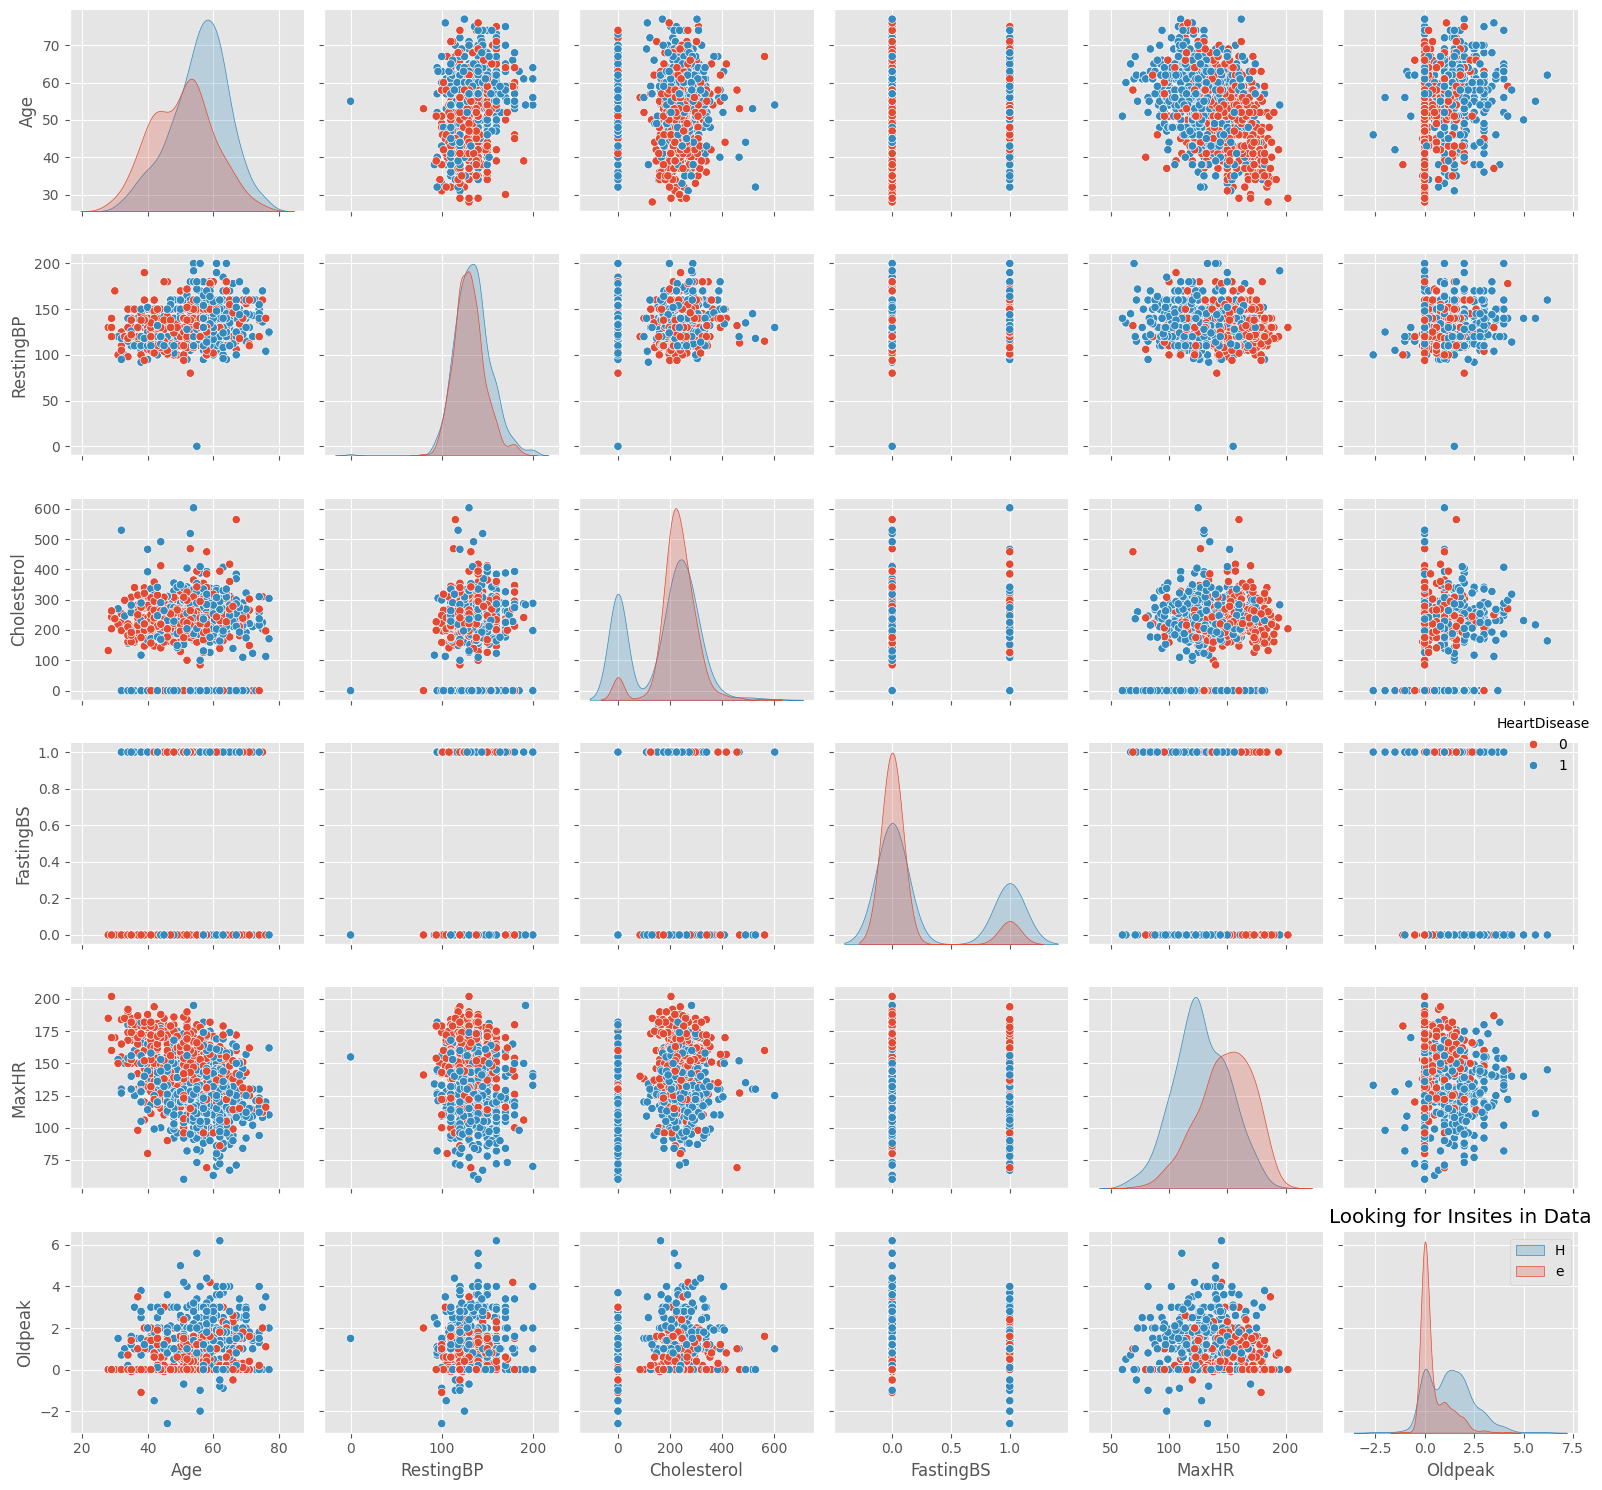

In [ ]:
plt.figure(figsize=(15,10))
sns.pairplot(df,hue="HeartDisease")
plt.title("Looking for Insightes in Data")
plt.legend("HeartDisease")
plt.tight_layout()
plt.plot()

### Now to check the linearity of the variables it is a good practice to plot distribution graph and look for skewness of features. Kernel density estimate (kde) is a quite useful tool for plotting the shape of a distribution.

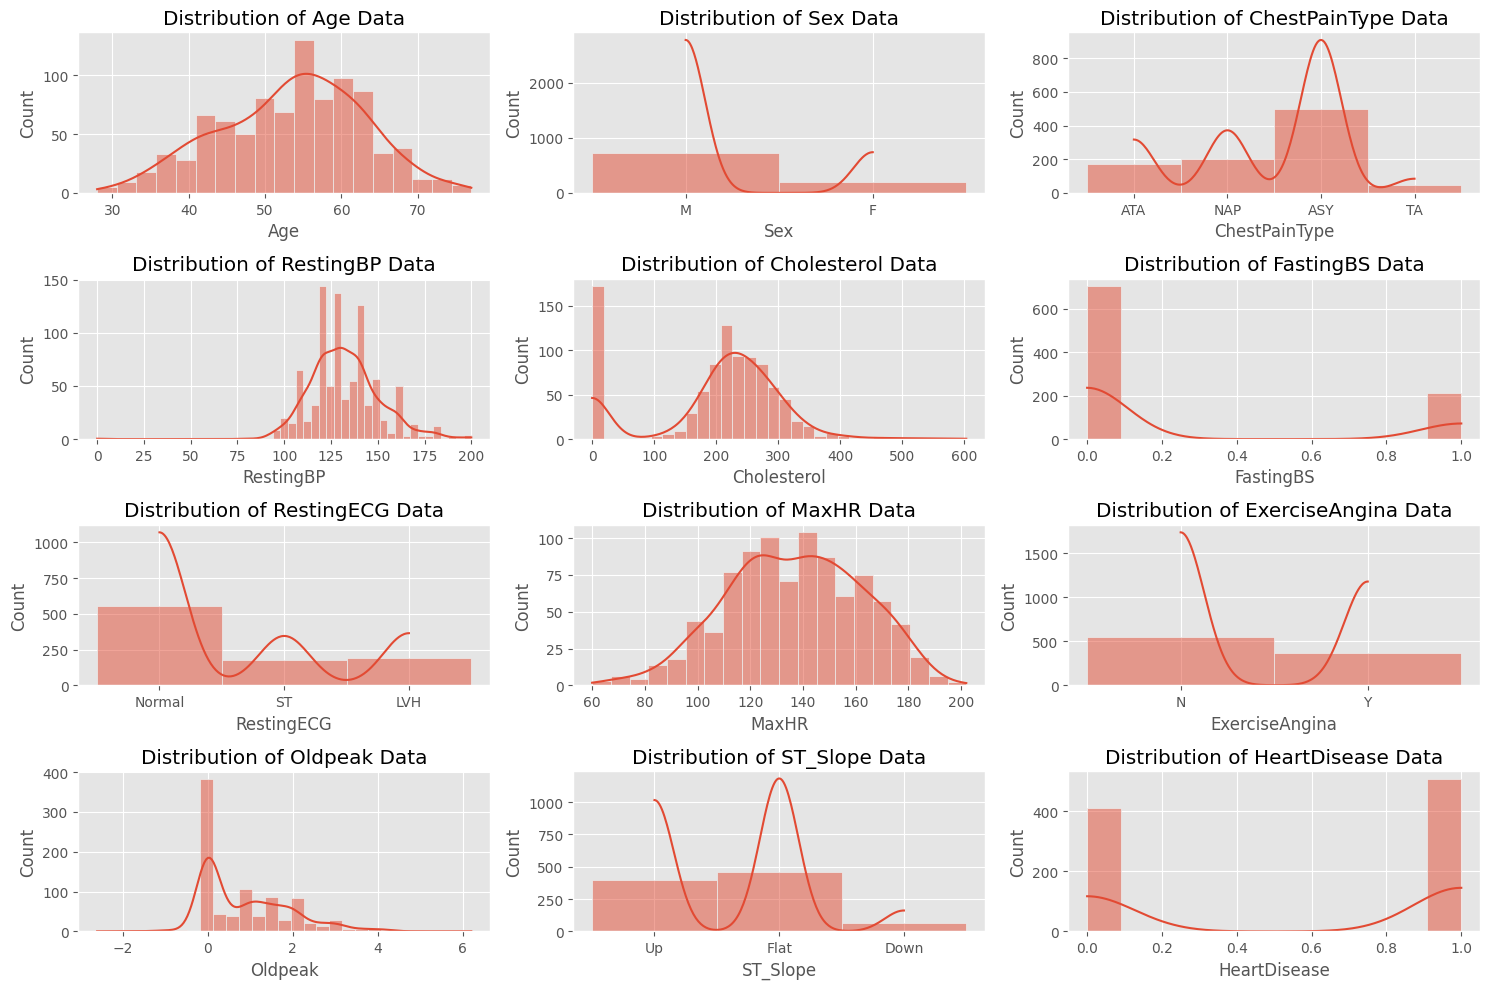

In [ ]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()



# Outliers

In [ ]:

fig = px.box(df,y="Age",x="HeartDisease",title=f"Distrubution of Age")
fig.show()

In [ ]:
fig = px.box(df,y="RestingBP",x="HeartDisease",title=f"Distrubution of RestingBP",color="Sex")
fig.show()

In [ ]:
fig = px.box(df,y="Cholesterol",x="HeartDisease",title=f"Distrubution of Cholesterol")
fig.show()

In [ ]:
fig = px.box(df,y="Oldpeak",x="HeartDisease",title=f"Distrubution of Oldpeak")
fig.show()

In [ ]:
fig = px.box(df,y="MaxHR",x="HeartDisease",title=f"Distrubution of MaxHR")
fig.show()

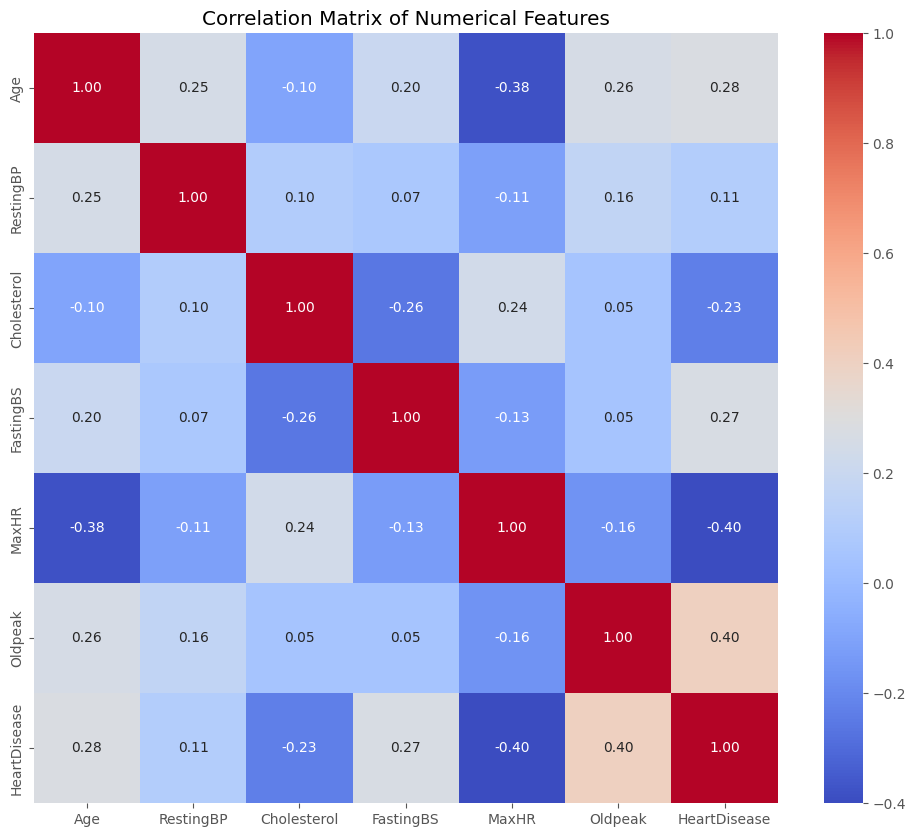

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


In [ ]:
# Based on the correlation matrix, we can identify features that are highly correlated with the target variable ('HeartDisease').
# We can also look for features that are highly correlated with each other, as these might be redundant.

# Features with high positive correlation with 'HeartDisease':
# - Age
# - RestingBP
# - Cholesterol
# - Oldpeak

# Features with high negative correlation with 'HeartDisease':
# - MaxHR

# We can consider selecting these features for our model. We can also consider removing features that are highly correlated with each other to avoid redundancy.
# For example, 'RestingBP' and 'Cholesterol' are moderately correlated, so we might consider keeping only one of them.

# We can also use feature importance scores from a tree-based model to further identify the most important features.

# Selected features based on correlation:
selected_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# We can further refine this list based on domain knowledge and feature importance scores from a model.


In [ ]:
numerical_df = df_tree.select_dtypes(include=['number'])

correlation_matrix = numerical_df.corr()

correlation_matrix

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,0.055750,-0.077150,0.274459,-0.042942,0.198039,-0.007484,-0.383374,0.215793,0.266295,-0.268264,0.282039
Sex,0.055750,1.000000,-0.126559,0.018717,-0.190713,0.120076,0.071552,-0.189878,0.190664,0.116254,-0.150693,0.305445
ChestPainType,-0.077150,-0.126559,1.000000,-0.011818,0.013115,-0.073151,-0.072537,0.291560,-0.354727,-0.180408,0.213521,-0.386828
RestingBP,0.274459,0.018717,-0.011818,1.000000,0.113785,0.064806,0.026082,-0.109674,0.158825,0.174026,-0.074377,0.113658
Cholesterol,-0.042942,-0.190713,0.013115,0.113785,1.000000,-0.188082,-0.177116,0.175997,0.016763,0.058568,0.063680,-0.138663
FastingBS,0.198039,0.120076,-0.073151,0.064806,-0.188082,1.000000,0.087050,-0.131018,0.060451,0.069180,-0.175774,0.267291
RestingECG,-0.007484,0.071552,-0.072537,0.026082,-0.177116,0.087050,1.000000,-0.179168,0.077500,-0.015096,-0.006778,0.057384
MaxHR,-0.383374,-0.189878,0.291560,-0.109674,0.175997,-0.131018,-0.179168,1.000000,-0.376149,-0.176992,0.346587,-0.402627
ExerciseAngina,0.215793,0.190664,-0.354727,0.158825,0.016763,0.060451,0.077500,-0.376149,1.000000,0.422670,-0.428706,0.494282
Oldpeak,0.266295,0.116254,-0.180408,0.174026,0.058568,0.069180,-0.015096,-0.176992,0.422670,1.000000,-0.513817,0.420282


# Training our Machine Learning Model :


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

## NON-TREE BASED ALGORITHMS

In [ ]:
feature_col_nontree=df_nontree.columns.to_list()
feature_col_nontree.remove(target)

### 1.Using Naive Bayers

In [ ]:
acc_Gauss=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_nontree,y=y)):

    X_train=df_nontree.loc[trn_,feature_col_nontree]
    y_train=df_nontree.loc[trn_,target]

    X_valid=df_nontree.loc[val_,feature_col_nontree]
    y_valid=df_nontree.loc[val_,target]

    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)

    clf=GaussianNB()
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_Gauss.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")
    pass

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.78      0.93      0.85        82
           1       0.93      0.79      0.86       102

    accuracy                           0.85       184
   macro avg       0.86      0.86      0.85       184
weighted avg       0.87      0.85      0.85       184

The accuracy for 1 : 0.8604734576757532
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        82
           1       0.93      0.85      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184

The accuracy for 2 : 0.8837876614060258
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.96      0.63      0.76        82
           1       0.77      0.98      0.86       102

    accuracy                           0.83  

### 2.Using SVM(Support Vector Machines):

In [ ]:
## Using Sigmoid Kernel
acc_svm_sig=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_nontree,y=y)):

    X_train=df_nontree.loc[trn_,feature_col_nontree]
    y_train=df_nontree.loc[trn_,target]

    X_valid=df_nontree.loc[val_,feature_col_nontree]
    y_valid=df_nontree.loc[val_,target]

    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)

    clf=SVC(kernel="sigmoid")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_svm_sig.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")

    pass

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.83      0.84      0.84        82
           1       0.87      0.86      0.87       102

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184

The accuracy for 1 : 0.852104256336681
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.71      0.77      0.74        82
           1       0.80      0.75      0.77       102

    accuracy                           0.76       184
   macro avg       0.75      0.76      0.75       184
weighted avg       0.76      0.76      0.76       184

The accuracy for 2 : 0.7566953610712578
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.85      0.73      0.78        82
           1       0.81      0.89      0.85       102

    accuracy                           0.82   

In [ ]:
# Using Linear Kernel

acc_svm=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_nontree,y=y)):

    X_train=df_nontree.loc[trn_,feature_col_nontree]
    y_train=df_nontree.loc[trn_,target]

    X_valid=df_nontree.loc[val_,feature_col_nontree]
    y_valid=df_nontree.loc[val_,target]

    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)

    clf=SVC(kernel="linear")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_svm.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")

    pass

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.81      0.91      0.86        82
           1       0.92      0.82      0.87       102

    accuracy                           0.86       184
   macro avg       0.86      0.87      0.86       184
weighted avg       0.87      0.86      0.86       184

The accuracy for 1 : 0.8690817790530847
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.77      0.91      0.84        82
           1       0.92      0.78      0.85       102

    accuracy                           0.84       184
   macro avg       0.85      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184

The accuracy for 2 : 0.8494739359158296
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.96      0.65      0.77        82
           1       0.78      0.98      0.87       102

    accuracy                           0.83  

In [ ]:
## Using RBF kernel
acc_svm_poly=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_nontree,y=y)):

    X_train=df_nontree.loc[trn_,feature_col_nontree]
    y_train=df_nontree.loc[trn_,target]

    X_valid=df_nontree.loc[val_,feature_col_nontree]
    y_valid=df_nontree.loc[val_,target]

    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)

    clf=SVC(kernel="poly")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_svm_poly.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")

    pass

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.87      0.90      0.89        82
           1       0.92      0.89      0.91       102

    accuracy                           0.90       184
   macro avg       0.89      0.90      0.90       184
weighted avg       0.90      0.90      0.90       184

The accuracy for 1 : 0.897297943567671
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.77      0.90      0.83        82
           1       0.91      0.78      0.84       102

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.85      0.84      0.84       184

The accuracy for 2 : 0.8433763749402199
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.93      0.63      0.75        82
           1       0.77      0.96      0.85       102

    accuracy                           0.82   

In [ ]:
## Using RBF kernel
acc_svm_rbf=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_nontree,y=y)):

    X_train=df_nontree.loc[trn_,feature_col_nontree]
    y_train=df_nontree.loc[trn_,target]

    X_valid=df_nontree.loc[val_,feature_col_nontree]
    y_valid=df_nontree.loc[val_,target]

    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)

    clf=SVC(kernel="rbf")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_svm_rbf.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")

    pass

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        82
           1       0.91      0.93      0.92       102

    accuracy                           0.91       184
   macro avg       0.91      0.91      0.91       184
weighted avg       0.91      0.91      0.91       184

The accuracy for 1 : 0.9108082257293162
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.77      0.90      0.83        82
           1       0.91      0.78      0.84       102

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.85      0.84      0.84       184

The accuracy for 2 : 0.8433763749402199
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.89      0.70      0.78        82
           1       0.79      0.93      0.86       102

    accuracy                           0.83  

# Logistic Regression

In [ ]:
acc_log=[]

kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_nontree,y=y)):

    X_train=df_nontree.loc[trn_,feature_col_nontree]
    y_train=df_nontree.loc[trn_,target]

    X_valid=df_nontree.loc[val_,feature_col_nontree]
    y_valid=df_nontree.loc[val_,target]

    #print(pd.DataFrame(X_valid).head())
    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)


    clf=LogisticRegression()
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_log.append(acc)
    print(f"The accuracy for Fold {fold+1} : {acc}")
    pass

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        82
           1       0.93      0.83      0.88       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184

The accuracy for Fold 1 : 0.8800813008130083
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        82
           1       0.91      0.80      0.85       102

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.86      0.85      0.85       184

The accuracy for Fold 2 : 0.8531802965088474
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.96      0.65      0.77        82
           1       0.78      0.98      0.87       102

    accuracy                       

## K-nearest Neighbors
The optimal K value usually found is the square root of N, where N is the total number of samples


K-nearest neighbors (k-NN) is a pattern recognition algorithm that uses training datasets to find the k closest relatives in future examples.

When k-NN is used in classification, you calculate to place data within the category of its nearest neighbor. If k = 1, then it would be placed in the class nearest 1. K is classified by a plurality poll of its neighbors.


In [ ]:
## UsIng rbf kernel

acc_KNN=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_nontree,y=y)):

    X_train=df_nontree.loc[trn_,feature_col_nontree]
    y_train=df_nontree.loc[trn_,target]

    X_valid=df_nontree.loc[val_,feature_col_nontree]
    y_valid=df_nontree.loc[val_,target]

    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)

    clf=KNeighborsClassifier(n_neighbors=32)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_KNN.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")

    pass

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        82
           1       0.93      0.93      0.93       102

    accuracy                           0.92       184
   macro avg       0.92      0.92      0.92       184
weighted avg       0.92      0.92      0.92       184

The accuracy for 1 : 0.9230033476805357
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.78      0.90      0.84        82
           1       0.91      0.79      0.85       102

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184

The accuracy for 2 : 0.8482783357245336
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.92      0.72      0.81        82
           1       0.81      0.95      0.87       102

    accuracy                           0.85  

### TREE BASED ALGORITHM

# Decision tree Classifier

In [ ]:
feature_col_tree=df_tree.columns.to_list()
feature_col_tree.remove(target)

In [ ]:
acc_Dtree=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_tree,y=y)):

    X_train=df_tree.loc[trn_,feature_col_tree]
    y_train=df_tree.loc[trn_,target]

    X_valid=df_tree.loc[val_,feature_col_tree]
    y_valid=df_tree.loc[val_,target]

    clf=DecisionTreeClassifier(criterion="entropy")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_Dtree.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.69      0.85      0.77        82
           1       0.86      0.70      0.77       102

    accuracy                           0.77       184
   macro avg       0.77      0.77      0.77       184
weighted avg       0.78      0.77      0.77       184

The accuracy for 1 : 0.7748684839789574
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.67      0.88      0.76        82
           1       0.87      0.66      0.75       102

    accuracy                           0.76       184
   macro avg       0.77      0.77      0.76       184
weighted avg       0.78      0.76      0.75       184

The accuracy for 2 : 0.7674557627929219
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.85      0.63      0.73        82
           1       0.76      0.91      0.83       102

    accuracy                           0.79  

In [ ]:
# prompt: Using dataframe X_train: show the 11 features in it.

# Display the first 11 features/columns of the dataframe
print(X_train.columns[:])

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'],
      dtype='object')


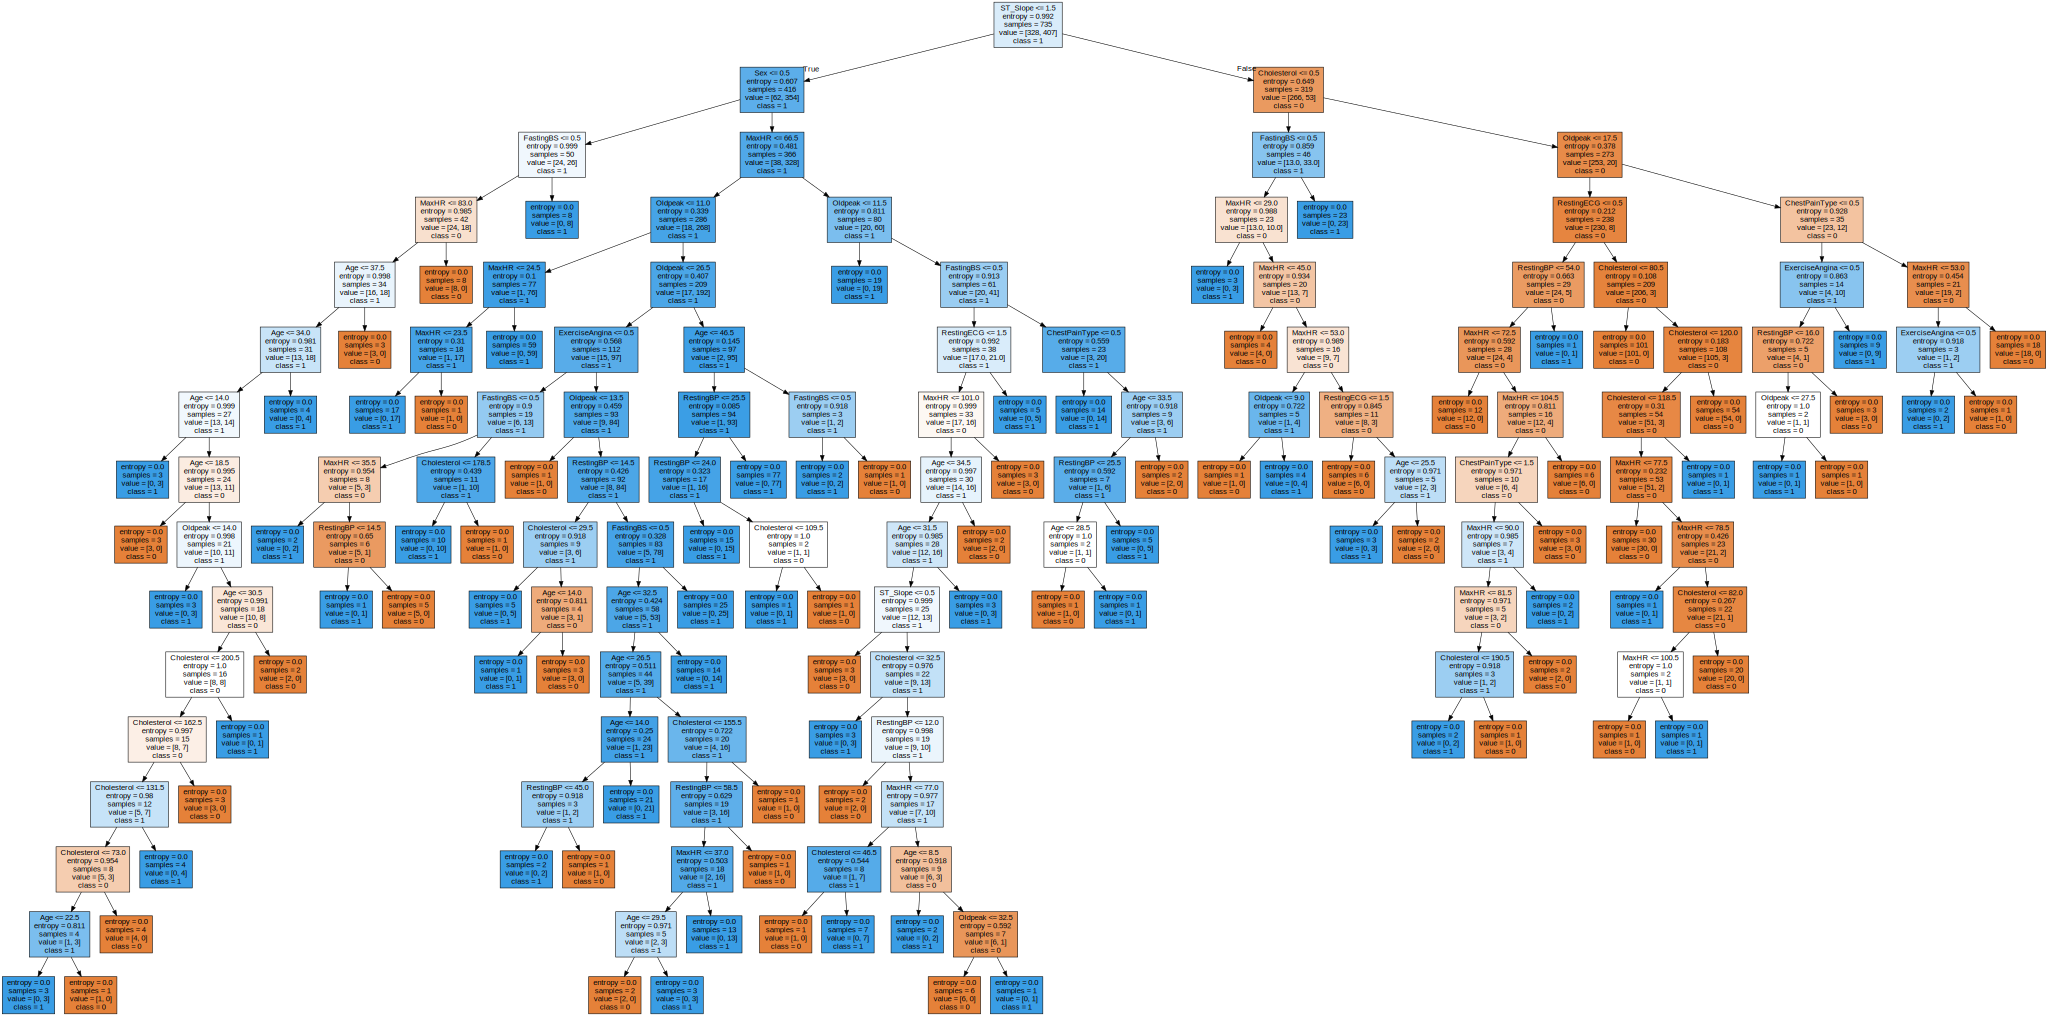

In [ ]:
import graphviz
from sklearn import tree

class_names = df_tree[target].unique().astype(str)

dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=feature_col_tree,
                                class_names=class_names, # Pass class_names as an array-like object
                                filled=True)

graph = graphviz.Source(dot_data, format="png")
graph

### Random Forest Classifier

In [ ]:
acc_RandF=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_tree,y=y)):

    X_train=df_tree.loc[trn_,feature_col_tree]
    y_train=df_tree.loc[trn_,target]

    X_valid=df_tree.loc[val_,feature_col_tree]
    y_valid=df_tree.loc[val_,target]

    clf=RandomForestClassifier(n_estimators=200,criterion="entropy")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_RandF.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")



The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        82
           1       0.92      0.86      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184

The accuracy for 1 : 0.8825920612147299
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.78      0.91      0.84        82
           1       0.92      0.79      0.85       102

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.86      0.85      0.85       184

The accuracy for 2 : 0.8543758967001435
The fold is : 2 : 
              precision    recall  f1-score   support

           0       1.00      0.62      0.77        82
           1       0.77      1.00      0.87       102

    accuracy                           0.83  

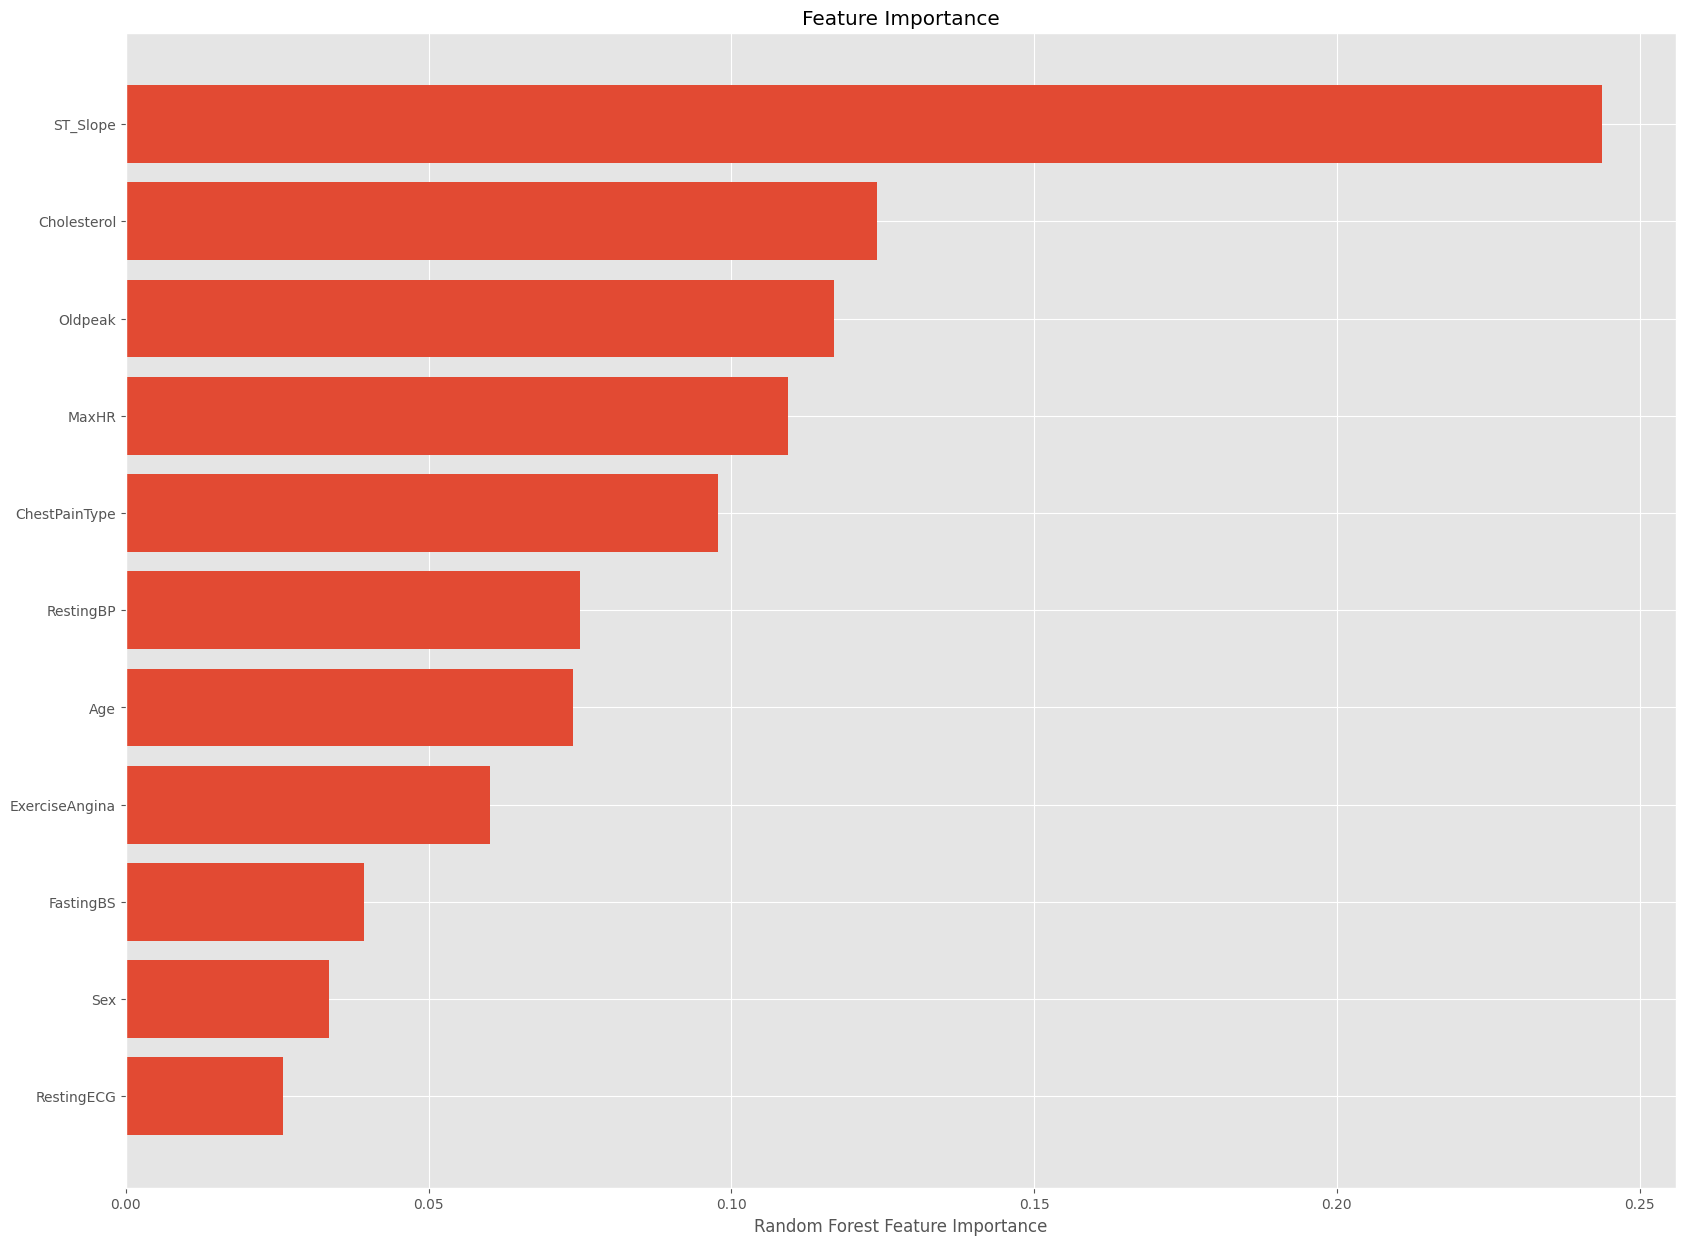

In [ ]:
plt.figure(figsize=(20,15))
importance = clf.feature_importances_
idxs = np.argsort(importance)
plt.title("Feature Importance")
plt.barh(range(len(idxs)),importance[idxs],align="center")
plt.yticks(range(len(idxs)),[feature_col_tree[i] for i in idxs])
plt.xlabel("Random Forest Feature Importance")
plt.show()

### 3. XGBoost

In [ ]:
acc_XGB=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_tree,y=y)):

    X_train=df_tree.loc[trn_,feature_col_tree]
    y_train=df_tree.loc[trn_,target]

    X_valid=df_tree.loc[val_,feature_col_tree]
    y_valid=df_tree.loc[val_,target]

    clf=XGBClassifier()
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_XGB.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.83      0.93      0.87        82
           1       0.93      0.84      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.88      0.88       184

The accuracy for 1 : 0.884983261597322
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.77      0.91      0.84        82
           1       0.92      0.78      0.85       102

    accuracy                           0.84       184
   macro avg       0.85      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184

The accuracy for 2 : 0.8494739359158296
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.96      0.61      0.75        82
           1       0.76      0.98      0.85       102

    accuracy                           0.82   

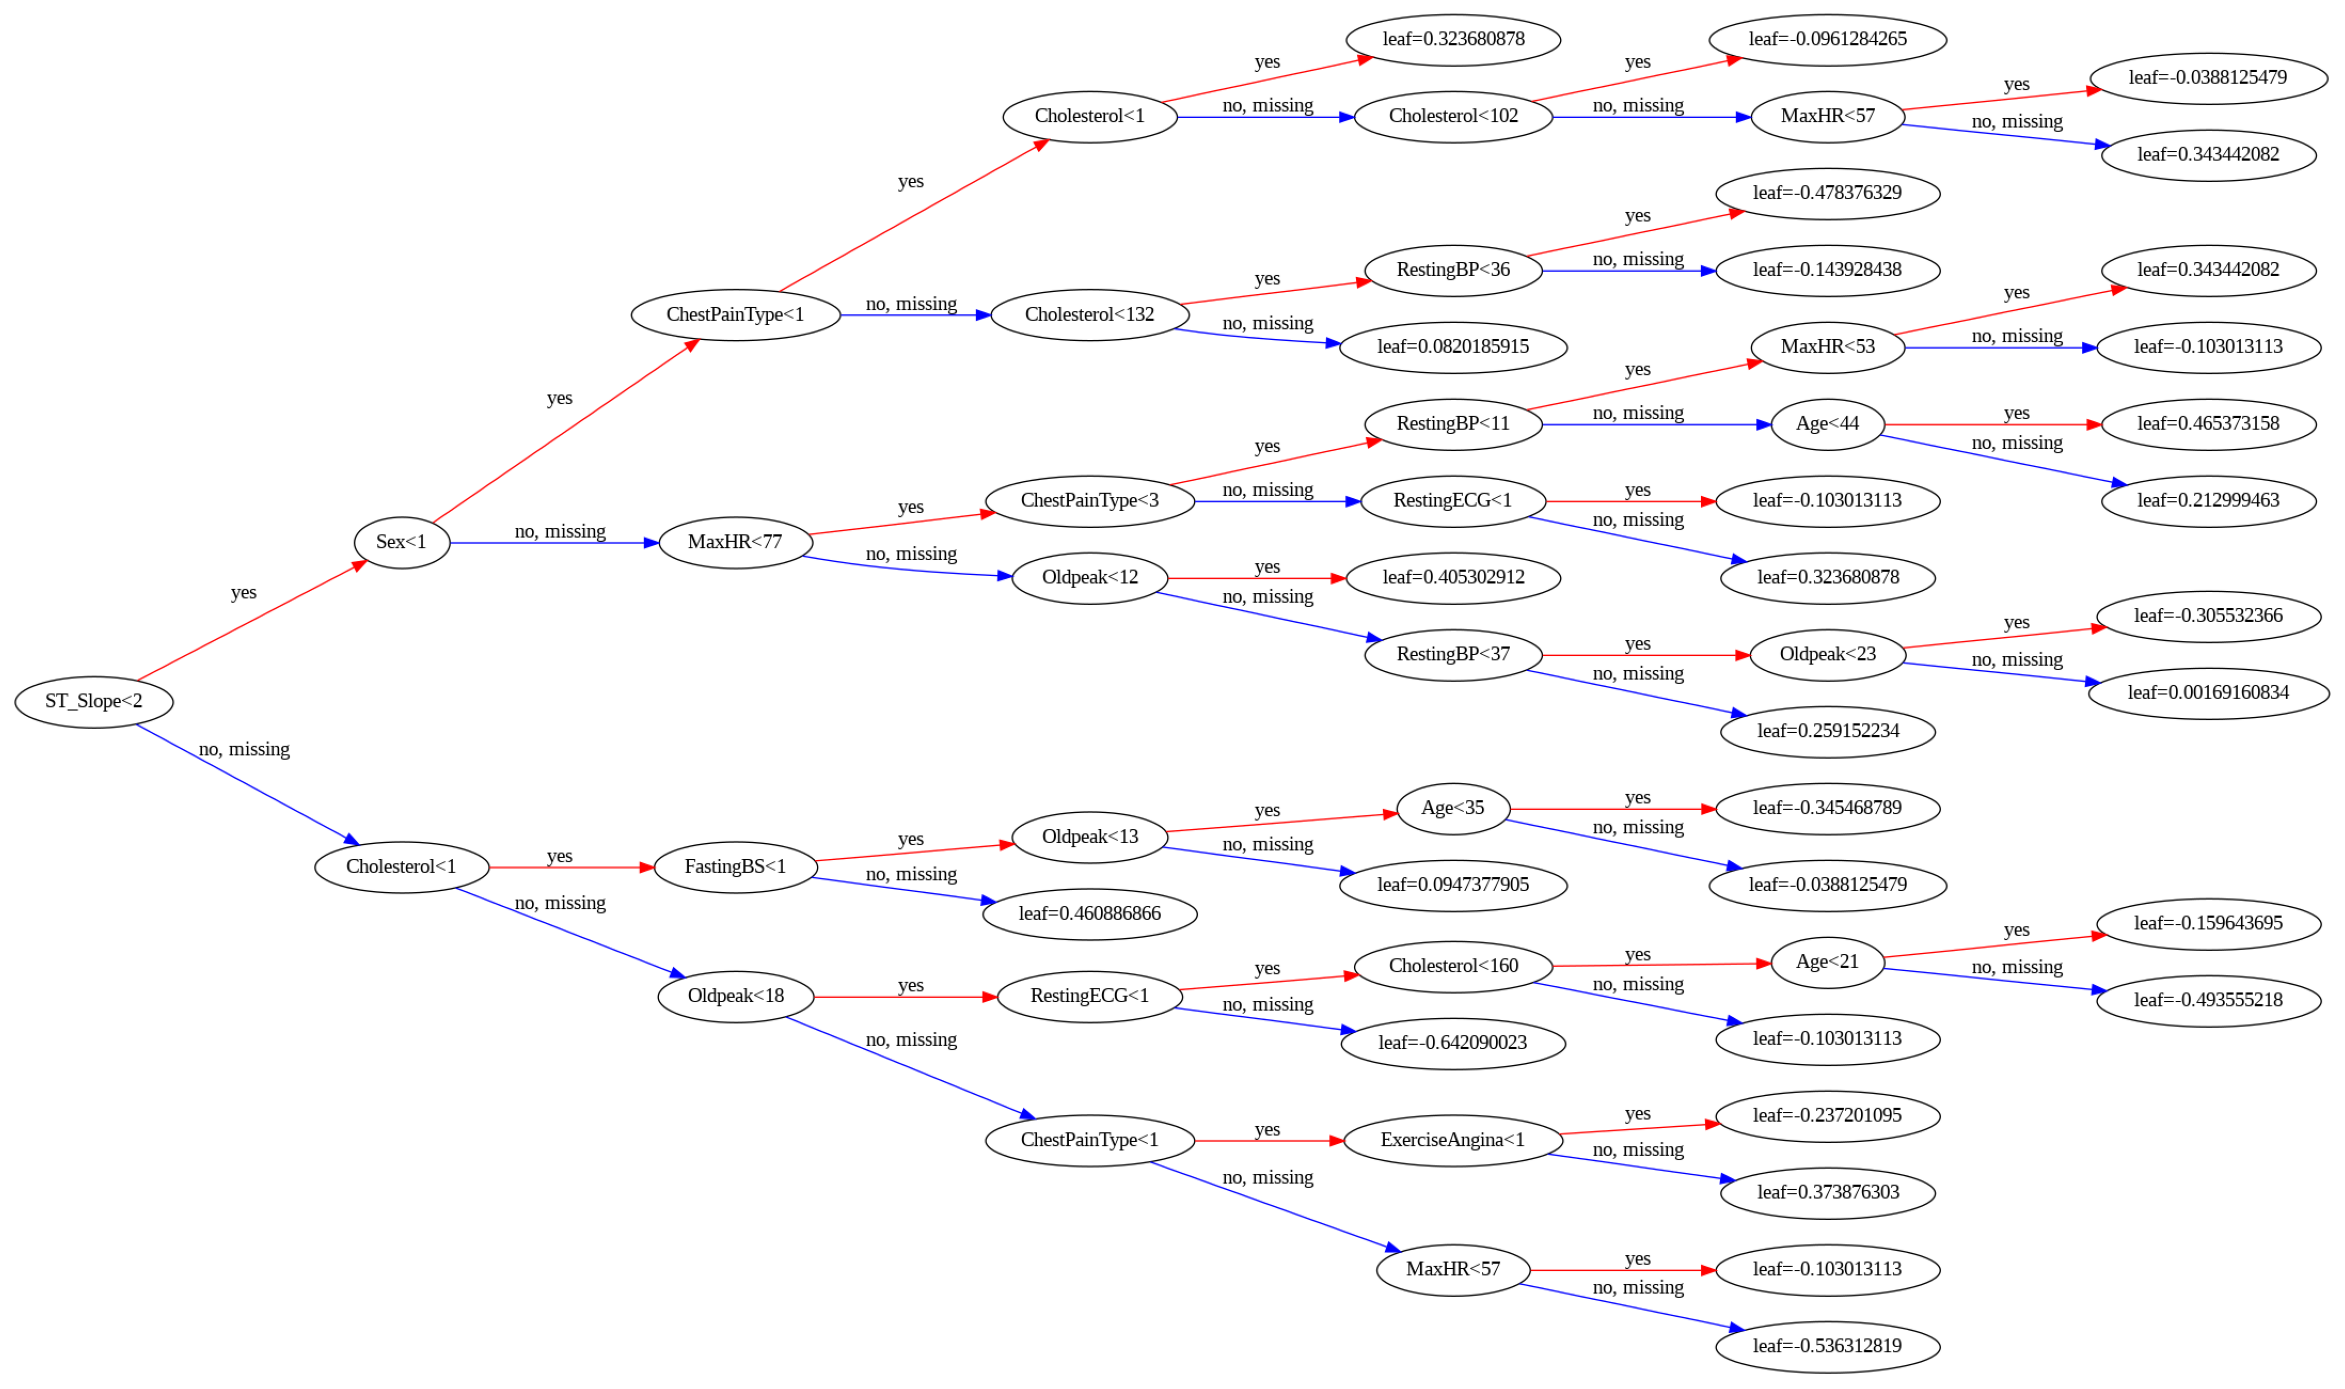

In [ ]:
fig, ax = plt.subplots(figsize=(30, 30))
from xgboost import plot_tree
plot_tree(clf,num_trees=0,rankdir="LR",ax=ax)
plt.show()

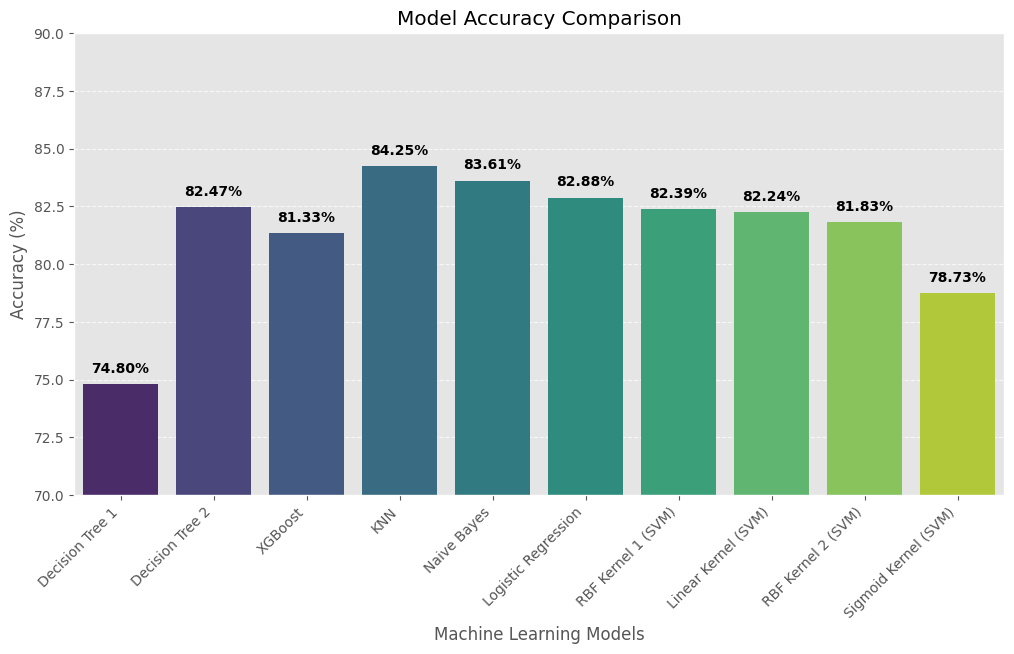

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data for tree-based algorithms
tree_models = {
    "Decision Tree 1": 74.80,
    "Decision Tree 2": 82.47,
    "XGBoost": 81.33
}

# Data for non-tree-based algorithms
non_tree_models = {
    "KNN": 84.25,
    "Naive Bayes": 83.61,
    "Logistic Regression": 82.88,
    "RBF Kernel 1 (SVM)": 82.39,
    "Linear Kernel (SVM)": 82.24,
    "RBF Kernel 2 (SVM)": 81.83,
    "Sigmoid Kernel (SVM)": 78.73
}

# Combine data
data = {**tree_models, **non_tree_models}

# Create bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=list(data.keys()), y=list(data.values()), palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Machine Learning Models")
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy Comparison")
plt.ylim(70, 90)  # Adjust y-axis range for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with accuracy values
for index, value in enumerate(data.values()):
    plt.text(index, value + 0.5, f"{value:.2f}%", ha='center', fontsize=10, fontweight='bold')

plt.show()